# Prediction California housing prices with a DecisionTree

### Imports

In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

### Read Data

In [2]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)

data_x = data.data
data_y = data.target * 100000

### Fit into categories

In [3]:
# Discretize prices into 3 categories
# <150k cheap
# 150k < , < 300k medium
# 300k > expensive

data_y_processed = pd.cut(data_y, bins=[0, 150000, 300000, np.inf], labels=[0, 1, 2])

### Train/Test Split

In [4]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(data_x, data_y_processed, test_size=0.2, random_state=42)

### Create the Decision Tree

In [5]:
model = DecisionTreeClassifier(
    # Limit tree depth
    max_depth=5,        
    # no overfitting
    min_samples_split=10,  
    
    criterion='entropy',
    random_state=42
)

# Train the model
model.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10,
                       random_state=42)

### Metrics

In [6]:
from sklearn.metrics import accuracy_score

test_y_prediction = model.predict(test_x)

print("Accuracy:", accuracy_score(test_y, test_y_prediction))

Accuracy: 0.7046996124031008


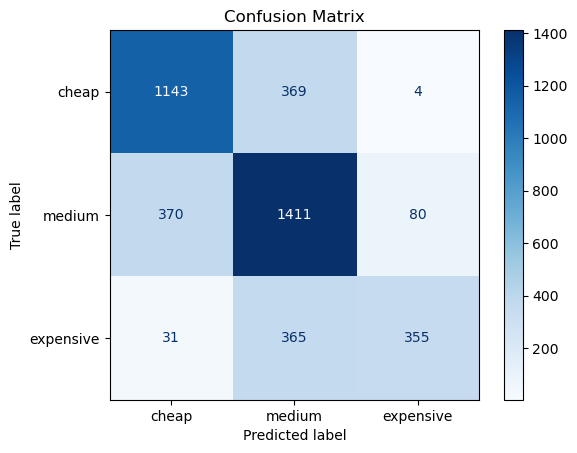

In [7]:
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(test_y, test_y_prediction)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['cheap', 'medium', 'expensive'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()